# Dataset Preprocessing
- Missing Value Halndling 
- bordering
- NaN bad Values
- ignore bad columns
- Drop NaN Values
- Hist Show
- Fill NaN (Mean, Meadian, Regression)
- easy Save and show after any inside functions

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sb
from sklearn.metrics import r2_score


2861
9.28645011533061e+19
percentage error of "Marketcap" :  92


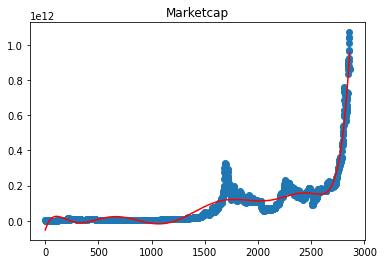

2861
5434771024678.903
percentage error of "High" :  91


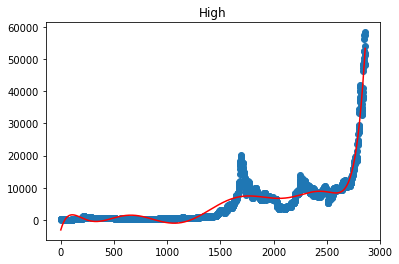

In [106]:
class Preprocess:
    def __init__(self, csv_Addr):
        self.csv_Addr = csv_Addr
        self.df = pd.read_csv(csv_Addr)

    def __repr__(self):
        return repr(self.df)

    def Data_Frame(self):
        return self.df
    
    def Save_Data_Frame(self, name='Data_frame.csv', zip=False, index=False):
        if zip==True:
            compression = dict(method='zip', archive_name="Data_frame.csv")
            self.df.to_csv(path_or_buf=name, index=index, compression=compression)

        self.df.to_csv(path_or_buf=name, index=index)

    def Bordering(self,bordering=[0, [0,'end']], all_rows = False , skip_blank_lines=False):
        if len(bordering) != 2 or len(bordering[1]) != 2 :
            raise ValueError('invalid bordering format,main and inside list must have 2 item, should like [0,[0:10]] or [0,[0:"end"]]')

        if all_rows == True:
            bordering_row = len(pd.read_csv(self.csv_Addr))
        else:
            bordering_row = bordering[0]
        
        bordering_firstCol = bordering[1][0]
        bordering_lastCol = bordering[1][1]

    
        labels = pd.read_csv(self.csv_Addr).columns 
        
        if bordering_lastCol == 'end':
            self.df = pd.read_csv(self.csv_Addr, nrows=bordering_row, usecols=labels[bordering_firstCol:], skip_blank_lines=skip_blank_lines)
        
        elif bordering == None:
            self.df = pd.read_csv(self.csv_Addr, nrows=bordering_row, usecols=labels[0:], skip_blank_lines=skip_blank_lines)
       
        else:
            self.df = pd.read_csv(self.csv_Addr, nrows=bordering_row, usecols=labels[bordering_firstCol:bordering_lastCol], skip_blank_lines=skip_blank_lines)


    
        # return self.df
        

    def NaN_BadValue(self, Value):
        print(type(self.df))
        print("1\n1\n\n\n")
        self.df = pd.read_csv(self.csv_Addr , index_col=0, skiprows=3, na_values=Value)


    def Ignore_BadColumn(self, likeColumnName=None, case=False):
        self.df.drop(self.df.columns[self.df.columns.str.contains(likeColumnName, case=case)], axis=1, inplace=True)

    def Drop_NaNs(self, axis='rows', how=None, thresh=None): #how : all, any
        if axis == 'cloumns':
            self.df.dropna(axis='columns', how=how)

        else:
            self.df.dropna(axis='rows', how=how)


    def HistShow(self, columnName=None, scatter= True,  box=False):
        # sb.set(rc= {'figure.figsize': (15,5)})
        if box:
            self.df.boxplot()


        if columnName==None:
            if scatter:
                cols = self.df.columns
                for i in cols:
                    plt.scatter(np.arange(0, len(self.df.values)), self.df[i].values) 
                    plt.title(i)
                    plt.show()
            else:
                for i in cols:
                    plt.hist(self.df[i].values, 50)
                    plt.title(i)
                    plt.show()

        elif type(columnName)==list:
            if scatter:
                for i in columnName:
                    b = plt.scatter(np.arange(0, len(self.df.values)), self.df[i].values) 
                    plt.title(i)
                    plt.show(b)
            else:
                for i in columnName:
                    a = plt.hist(self.df[i].values, 50)
                    plt.title(i)
                    plt.show()              
        
        else:
            raise ValueError('invalid input')





    def Fill_NaNs(self ,kind=None, regression_degree=None, regression_columns=None):    # NaN/ mean / meadian / regresion    
        
        if kind=='maen':
            cols = pd.read_csv(self.csv_Addr).columns
            for i in cols:
                a = self.df[i]
                b = self.df.notnull()[i]

                self.df[i] = self.df[i].fillna(a[b].mean())

        elif kind=='median':
            cols = self.df.columns
            for i in cols:
                a = self.df[i]
                b = self.df.notnull()[i]

                self.df[i] = self.df[i].fillna(a[b].median())


        elif kind=='regression':
            if not regression_degree or not regression_columns:
                raise ValueError('regression_degree(int in) or regression_columns(list in) parameter must be') # غلط نوشته شده
            

            try:
                cols = pd.read_csv(self.csv_Addr).columns
                for i in regression_columns:
                    null = self.df.isnull()[i].values
                    x = np.arange(0, len(self.df.values))
                    y = self.df[i].values 

                    print(max(x))
                
                    linear_equation = np.poly1d(np.polyfit(x, y, regression_degree))    # 13 -> 94
                    xp = np.linspace(0,  max(x), 1000) #3000 is good
                    plt.scatter(x, y)
                    plt.plot(xp, linear_equation(xp), c = 'red')
                    
                    print(linear_equation(10000))
                    r2 = r2_score(y, linear_equation(x))
                    print(f'percentage error of "{i}" : ', str(r2)[2:4])
                    
                    plt.title(i)
                    plt.show()
            except:
                raise ValueError('with your input column cant make regression! (must have int values)')
    

            # self.df.apply(lambda x: x.fillna(x.mean()),axis=0)

            # from sklearn.impute import SimpleImputer
            # imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
            # imputer = imputer.fit(self.df[:, 1:3])
            # self.df[:, 1:3] = imputer.transform(self.df[:, 1:3])


    #out layer
    #visualize






Sample = Preprocess('coin_Bitcoin.csv')
# print(Sample)
Sample.Bordering(bordering=[0,[0,"end"]], all_rows=True)
# Sample.NaN_BadValue('Bitcoin')
# Sample.Data_Frame()

Sample.Fill_NaNs('regression', regression_degree=9, regression_columns=['Marketcap', 'High'])

# Sample.HistShow(box=True)  #show all + boxplot
# Sample.HistShow(['Low', 'Close'], scatter=False)  # show Low, Close
# Sample.HistShow(['Low', 'Close'])  # show Low, Close


    #سطر = sample
    #ستون = feature, Attributes, label
